# Imports

In [2]:
import numpy as np
import scipy
from matplotlib import pyplot as plt

## Figure out temperature at which fuel and air react.
Use a K of 1.35

In [53]:
T1 = 298.0 # K
c_ratio = 10.0
K = 1.35
T2 = T1*c_ratio**(K-1)
T2

667.1388992933653

## Define sets of coefficients to solve for h(T).
These are from R.C. Reid et al., "The Properties of Gases and Liquids", 1977.

In [3]:
a_eth = 9.01
b_eth = 214e-3
c_eth = -83.9e-6
d_eth = 1.37e-9

In [4]:
a_o2 = 28.1
b_o2 = 0.0
c_o2 = 17.5e-6
d_o2 = -10.7e-9

In [5]:
a_n2 = 31.2
b_n2 = -13.6e-3
c_n2 = 26.8e-6
d_n2 = -11.7e-9

## Define a function that gives us the enthalpy

In [45]:
def enthalpy(coeff, T):
    """
    Takes array of coefficients for a particular compound and the temperature in K and returns the enthalpy 
    accoding to a polynomial function.
    """
    p = np.zeros(5)
    for i, c in enumerate(coeff):
        p[i] = 1.0/(4.0-i) * c
    return np.polyval(p, T)

def enthalpy_highT(coeff, T):
    """
    Takes array of coefficients for a particular compound and the temperature in K and returns the enthalpy 
    accoding to a polynomial function.
    """
    return coeff[0]*(4.0/7.0)*T**(7.0/4.0) + coeff[1]*(2.0/3.0)*T**(3.0/2.0) + coeff[2]*(4.0/5.0)*T**(5.0/4.0) + coeff[3]*T

In [7]:
coeff_o2 = np.array([d_o2, c_o2, b_o2, a_o2])
enthalpy(coeff_o2, 575.0)

16974.059371744792

Define all sets of coefficients into numpy arrays. Also define dictionaries for enthalpies of formation and at 298 K.

In [46]:
coeff_eth = np.array([d_eth, c_eth, b_eth, a_eth])
coeff_n2 = np.array([-0.298, 5.19, -26.9, 72.0]) # These are at the higher temp range.
coeff_co2 = np.array([0.0, -1.96, 30.5, -55.6]) # These are at the higher temp range.
coeff_h2o = np.array([-0.858, 15.6, -85.4, 180.0]) # These are at the higher temp range.

In [36]:
h_f = {'eth': -235310, 'o2': 0.0, 'n2': 0.0, 'co2': -393520, 'h2o': -241820}
h_298 = {'eth': enthalpy(coeff_eth,298.0), 'o2': 8682, 'n2': 8669, 'co2': 9364, 'h2o': 9904 }

## Define the function we need to solve
First calculated the left hand side (LHS), then defined the function we need to find the roots of as LHS-RHS = 0.

In [56]:
LHS = (h_f['eth']+enthalpy(coeff_eth,T2)-h_298['eth']) + 3*(h_f['o2']+22970-h_298['o2']) + 11.34*(h_f['n2']+19685-h_298['n2'])

In [57]:
func = lambda Tp: LHS - (2*(h_f['co2']+enthalpy_highT(coeff_co2,Tp)-h_298['co2']) + 3*(h_f['h2o']+enthalpy_highT(coeff_h2o,Tp)-h_298['h2o']) + 11.34*(h_f['n2']+enthalpy_highT(coeff_n2,Tp)-h_298['n2'])) 

Plot the function, so that we can get an initial guess for scipy.optimize.fsolve().

In [58]:
Tp = np.linspace(600, 3000, 100)

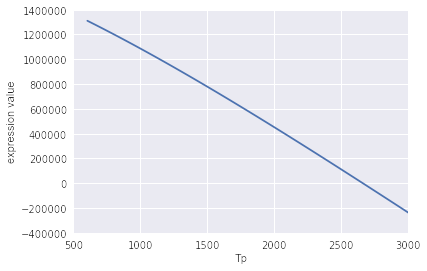

In [59]:
%matplotlib inline
import seaborn
plt.plot(Tp, func(Tp))
plt.xlabel("Tp")
plt.ylabel("expression value")
plt.show()

In [60]:
from scipy.optimize import fsolve

In [61]:
print fsolve(func, 2500)

[ 2668.29465778]
